# Exercise 1

a) Firstly, you will implement the function myhist3 that computes a 3-D histogram
from a three channel image. The images you will use are RGB, but the function
should also work on other color spaces. The resulting histogram is stored in a 3-D
matrix. The size of the resulting histogram is determined by the parameter n_bins.
The bin range calculation is exactly the same as in the previous assignment, except
now you will get one index for each image channel. Iterate through the image pixels
and increment the appropriate histogram cells. You can create an empty 3-D numpy
array with H = np.zeros((n_bins,n_bins,n_bins)). Take care that you normalize
the resulting histogram

In [2]:
import numpy as np
from UZ_utils import *
import cv2
from matplotlib import pyplot as plt

In [59]:
def myhist3(arr, n):
    min = np.min(arr)
    max = np.max(arr)
    diff = max - min
    shape = arr.shape
    arr = arr.reshape((shape[0] * shape[1], 3))
    arr = ((arr.astype(np.float64) - min) / diff) * (n-1)
    arr = arr.astype(np.uint8)
    counts = np.zeros((n, n, n))
    for pixel in arr:
        counts[pixel[0], pixel[1], pixel[2]] += 1
    
    return counts / len(arr)

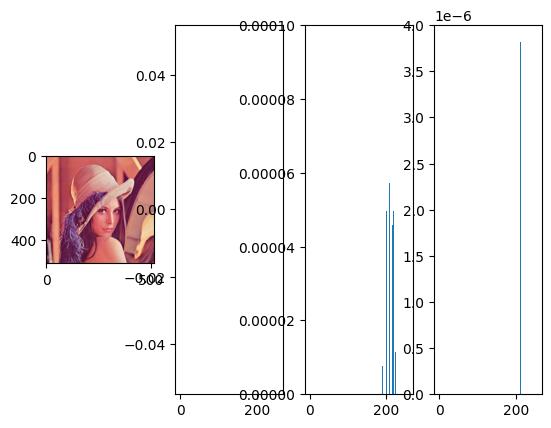

In [67]:
img = cv2.imread('images/lena.png') # 0-255
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
n_bins = 256
histogram = myhist3(img, n_bins)

f = plt.figure()
f.add_subplot(1, 4, 1)
plt.imshow(img)
f.add_subplot(1, 4, 2)
plt.bar(np.arange(n_bins), histogram[:, 0, 0])
f.add_subplot(1, 4, 3)
plt.bar(np.arange(n_bins), histogram[:, 100, 100])
f.add_subplot(1, 4, 4)
plt.bar(np.arange(n_bins), histogram[:, 200, 200])

plt.show()